# Make pvalue plots with Altair

## Load input files

In [1]:
import cnvutils
import pandas as pd
import numpy as np
import altair as alt
import os
from toolz.curried import pipe

In [2]:
# Altair options
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
# Load parameters
gen_params = cnvutils.load_params(os.path.join("..", "..", "..", "data", "gen_params.json"))
PANCAN = gen_params["PANCAN"]

chr_params = cnvutils.load_params(os.path.join("..", "..", "data", "chr_params.json"))
CHROMOSOME = chr_params["CHROMOSOME"]

arm_params = cnvutils.load_params(os.path.join("..", "data", "arm_params.json"))
ARM = arm_params["ARM"]
EVENT_TYPE = arm_params["TYPE"]

# Set cis or trans
CIS_OR_TRANS = "cis"

### Get t test proteomics results

In [4]:
read_path = os.path.join(
    "..", 
    "data", 
    f"chr{CHROMOSOME}{ARM}_{CIS_OR_TRANS}_02_ttest_{'harmonized' if PANCAN else 'AWG'}.tsv"
)

prot = pd.\
read_csv(read_path, sep="\t").\
drop(columns="Database_ID").\
reset_index(drop=True)

### Add locations

In [5]:
locs = cnvutils.\
get_gene_locations().\
reset_index().\
drop(columns="Database_ID").\
dropna(how="any").\
drop_duplicates(keep="first").\
sort_values(by="Name")

In [6]:
prot = prot.merge(
    right=locs,
    how="inner",
    left_on=["protein"],
    right_on=["Name"]
).sort_values(by=["cancer_type", "chromosome", "arm", "start_bp"])

In [7]:
prot

,cancer_type,protein,adj_p,change,Name,chromosome,start_bp,end_bp,arm
916,brca,SNAI2,5.846448e-01,-0.169196,SNAI2,8,48917598.0,48921740.0,q
674,brca,PCMTD1,1.150849e-01,0.184281,PCMTD1,8,51817575.0,51899186.0,q
776,brca,RB1CC1,2.009590e-06,0.344424,RB1CC1,8,52622458.0,52745843.0,q
55,brca,ATP6V1H,4.922459e-01,0.047930,ATP6V1H,8,53715543.0,53843558.0,q
977,brca,TCEA1,3.649030e-09,0.410475,TCEA1,8,53966552.0,54022456.0,q
499,brca,LYPLA1,9.755471e-03,0.262161,LYPLA1,8,54046367.0,54102017.0,q
500,brca,LYPLA1,3.016608e-01,-0.355953,LYPLA1,8,54046367.0,54102017.0,q
536,brca,MRPL15,3.791359e-04,0.281767,MRPL15,8,54135241.0,54148514.0,q
1010,brca,TMEM68,6.349784e-02,0.212427,TMEM68,8,55696424.0,55773407.0,q
991,brca,TGS1,4.112747e-07,0.287443,TGS1,8,55773446.0,55826445.0,q


In [8]:
summ = prot.groupby(["cancer_type"]).agg(
    sig_ct=("adj_p", lambda x: (x <= 0.05).sum()),
    tot_ct=("adj_p", lambda x: x.size)
)

summ = summ.assign(sig_prop=summ["sig_ct"] / summ["tot_ct"])
summ

,sig_ct,tot_ct,sig_prop
cancer_type,,,
brca,99,241,0.410788
colon,66,157,0.420382
hnscc,45,206,0.218447
lscc,71,222,0.319820
luad,90,214,0.420561
ovarian,59,185,0.318919


## Make dotplot

In [9]:
def make_pval_dotplot(df, title, group_col, val_col, color_col, dx, y=True, sig=0.05):
    
    df = df.sort_values(by=[
        "chromosome",
        "arm",
        "start_bp",
        "end_bp"
    ])
    
    val_log_col = "neg_log_p"
    log_cutoff = -np.log10(sig)
    df = df.assign(**{val_log_col: - np.log10(df[val_col])})
    
    if y:
        chart_y = alt.Y(
            val_log_col,
            title=val_log_col
        )
        
    else:
        chart_y = alt.Y(
            val_log_col,
            axis=alt.Axis(
                labels=False,
                ticks=False,
                title=None
            )
        )
        
    chart = alt.Chart(df).mark_point().encode(
        x=alt.X(
            group_col,
            title="Protein",
            sort=alt.SortField("Name"),
            axis=alt.Axis(
                labels=False,
                ticks=False,
            )
        ),
        y=chart_y,
        color=color_col
    )
    
    line = alt.Chart(pd.DataFrame({
        'y': [log_cutoff],
        "label": [f"-log({sig})"]
    })).mark_rule(color="crimson").encode(
        y="y"
    )

    text = line.mark_text(
        align="right",
        dx=dx
    ).encode(
        text="label"
    )

    if y:
        chart = (chart + line + text)
    else:
        chart = (chart + line)
        
    return chart.properties(
        title=title,
        width=800
    )

pval_dotplot = make_pval_dotplot(prot, f"{CHROMOSOME}{ARM} {EVENT_TYPE}", "Name", "adj_p", "cancer_type", -250)
pval_dotplot

alt.LayerChart(...)

In [10]:
# Save the chart
chart_fmt = gen_params["CHART_FORMAT"]
chart_scale = gen_params["CHART_SCALE"]

chart_dir = os.path.join("..", "data", "charts_img")
pval_dotplot_path = os.path.join(
    chart_dir,
    f"chr{CHROMOSOME}{ARM}_{CIS_OR_TRANS}_03_sig_effects_dotplot_{'harmonized' if PANCAN else 'AWG'}_altair.{chart_fmt}"
)

pval_dotplot.save(pval_dotplot_path, scale_factor=chart_scale)

INFO:tornado.access:200 GET / (::1) 5.04ms
INFO:tornado.access:200 GET / (::1) 5.04ms
INFO:tornado.access:200 GET /vega.js (::1) 3.02ms
INFO:tornado.access:200 GET /vega.js (::1) 3.02ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 4.52ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 4.52ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 6.02ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 6.02ms


## Dotplot with Matplotlib

Below is an alternate version of the same plot made with Matplotlib.

## Prepare the dataframe

In [11]:
read_path = os.path.join(
    "..", 
    "data", 
    f"chr{CHROMOSOME}{ARM}_{CIS_OR_TRANS}_02_ttest_{'harmonized' if PANCAN else 'AWG'}.tsv"
)

ttest_results = pd.\
read_csv(read_path, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")

ttest_results = ttest_results[["cancer_type", "adj_p"]]

ttest_results_long = ttest_results.\
reset_index().\
melt(id_vars=["protein", "cancer_type"]).\
sort_values('protein')

## Append location data and sort

In [12]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

results = results.sort_values(['start_bp', 'cancer_type'])

## Make the plot

/home/caleb/anaconda3/envs/dev/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


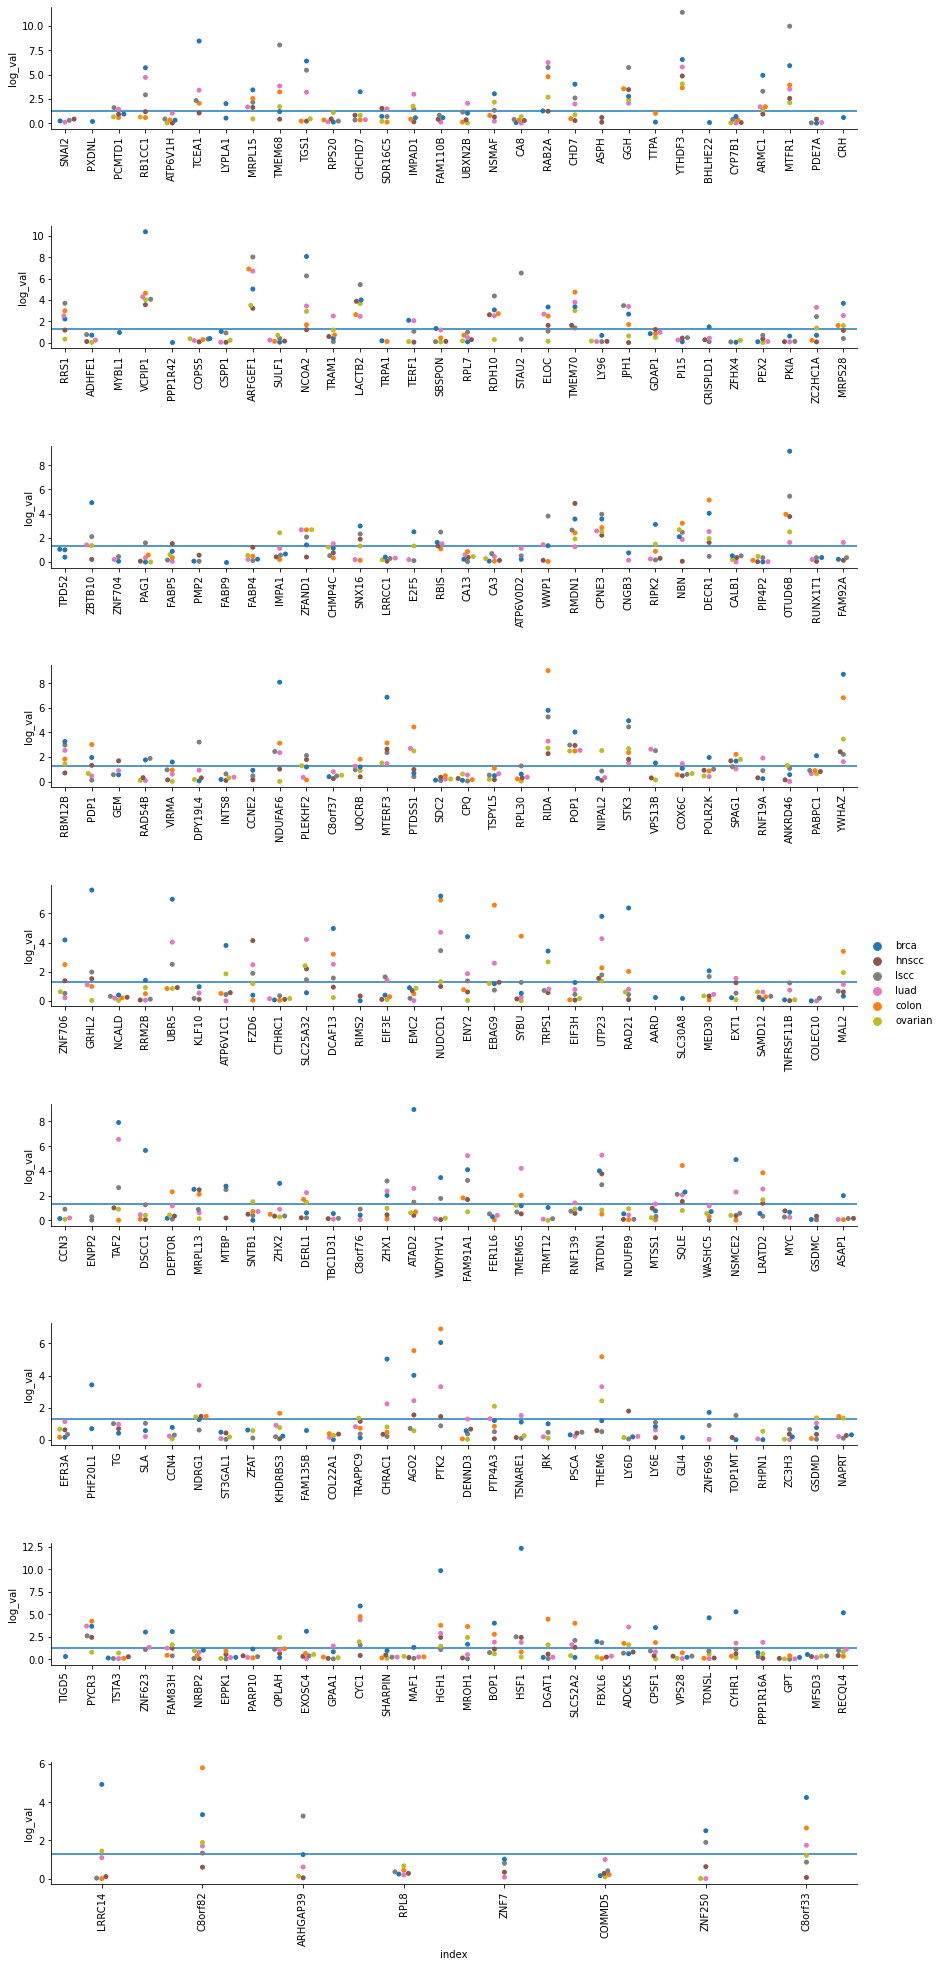

In [13]:
cnvutils.make_pvalue_plot(
    results,
    label_column='index', 
    value_column='value', 
    group_column='cancer_type')

## P value heatmap

Just for fun!

In [14]:
def make_pval_heatmap(df, title, prot_col, p_val_col, cancer_type_col, y=True, sig=0.05, height=500):
    
    df = df.sort_values(by=[
        "chromosome",
        "arm",
        "start_bp",
        "end_bp"
    ])
    
    p_val_log_col = "neg_log_p"
    df = df.assign(**{p_val_log_col: - np.log10(df[p_val_col])})

    chart = alt.Chart(df).mark_rect().encode(
        x=cancer_type_col,
        y=alt.Y(
            prot_col,
            title="Protein",
            sort=alt.SortField("Name"),
            axis=alt.Axis(
                labels=False,
                ticks=False,
            ),
        ),
        color=alt.Color(
            p_val_log_col,
            scale=alt.Scale(
                scheme="reds",
#                 domain=[0, 1],
#                 reverse=True,
            ),
            title=["Neg. log(P value)"],
        ),   
    ).properties(
        title=title,
        height=height,
    )

#     return chart

    # None of the code below will actually run
    df_sig = df[df[p_val_col] < 0.05].copy()
    df_nonsig = df[~(df[p_val_col] < 0.05)].copy()
                
    nonsig_chart = alt.Chart(df_nonsig).mark_rect().encode(
        x=cancer_type_col,
        y=alt.Y(
            prot_col,
            title="Protein",
            sort=alt.SortField("Name"),
            axis=alt.Axis(
                labels=False,
                ticks=False,
            ),
        ),
        color=alt.Color(
            p_val_col,
            scale=alt.Scale(
                scheme="blues",
                domain=[0, 1],
                reverse=True,
            ),
            legend=None,
            title=None,
        ),
    ).properties(
        title=title,
        height=height,
    )

    sig_chart = alt.Chart(df_sig).mark_rect().encode(
        x=cancer_type_col,
        y=alt.Y(
            prot_col,
            title="Protein",
            sort=alt.SortField("Name"),
            axis=alt.Axis(
                labels=False,
                ticks=False,
            ),
        ),
        color=alt.Color(
            p_val_col,
            scale=alt.Scale(
                scheme="reds",
                domain=[0, 1],
                reverse=True,
            ),
            title=["P value (red < 0.05,", " blue >= 0.05)"],
        ),   
    )

    return alt.hconcat(
        alt.layer(
            nonsig_chart,
            sig_chart,
        ).resolve_scale(
            color="independent"
        ),
        chart,
    ).resolve_scale(
        color="independent"
    ).properties(title=title)


pval_heatmap = make_pval_heatmap(prot, f"{CHROMOSOME}{ARM} {EVENT_TYPE}", "Name", "adj_p", "cancer_type")
pval_heatmap

alt.HConcatChart(...)

In [15]:
# Save the chart
pval_heatmap_path = os.path.join(
    chart_dir,
    f"chr{CHROMOSOME}{ARM}_{CIS_OR_TRANS}_03_sig_effects_heatmap_{'harmonized' if PANCAN else 'AWG'}_altair.{chart_fmt}"
)

pval_heatmap.save(pval_heatmap_path, scale_factor=chart_scale)

INFO:tornado.access:304 GET / (::1) 0.33ms
INFO:tornado.access:304 GET / (::1) 0.33ms
INFO:tornado.access:304 GET /vega-lite.js (::1) 1.28ms
INFO:tornado.access:304 GET /vega-lite.js (::1) 1.28ms
INFO:tornado.access:304 GET /vega-embed.js (::1) 1.87ms
INFO:tornado.access:304 GET /vega-embed.js (::1) 1.87ms
INFO:tornado.access:304 GET /vega.js (::1) 1.72ms
INFO:tornado.access:304 GET /vega.js (::1) 1.72ms
